2024

C:\Users\hp\AppData\Local\Temp\ipykernel_18416\345120349.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


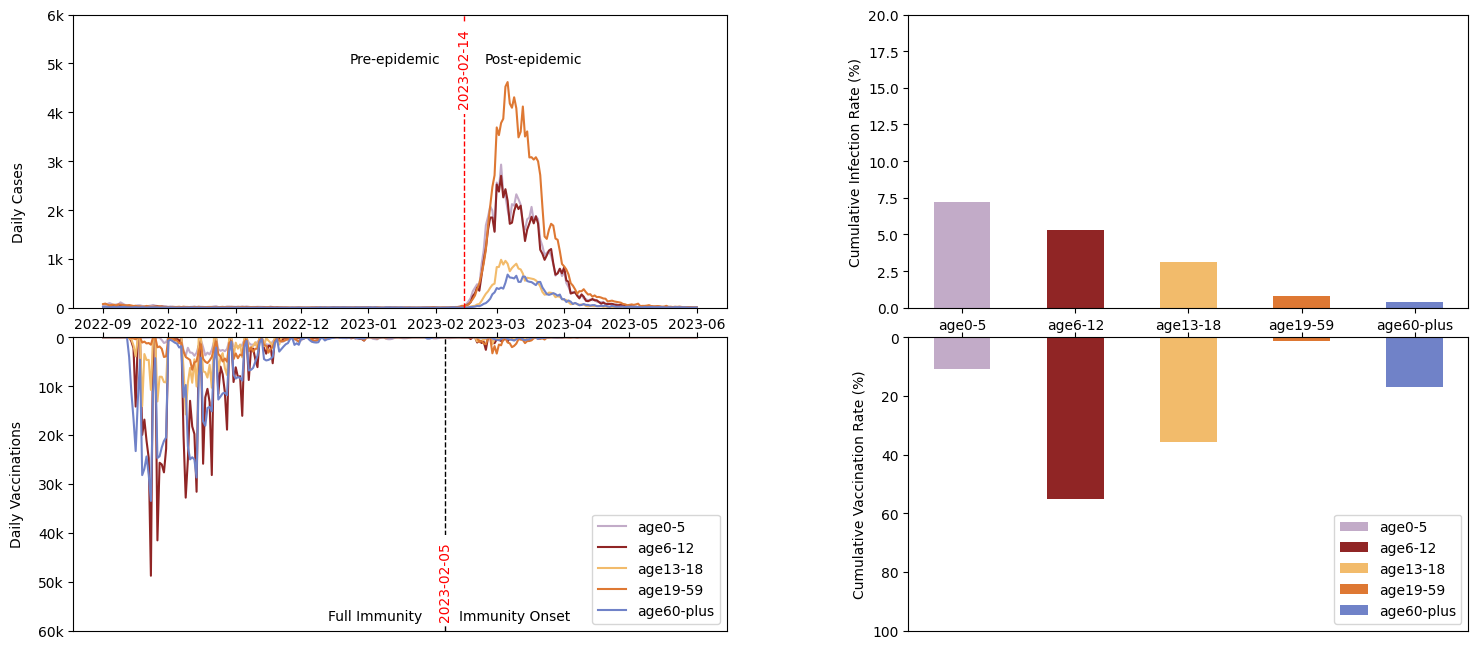

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k' if x >= 1000 else f'{int(x)}'


incidence_data = pd.read_excel('发病_总数据.xlsx')
vaccine_data = pd.read_excel('疫苗_总数据.xlsx')


age_groups = ['age0_5', 'age6_12', 'age13_18', 'age19_59', 'age60_plus']
colors = np.array([
    [194, 171, 200],
    [144, 37, 37],
    [242, 187, 107],
    [222, 120, 51],
    [112, 130, 200],  
]) / 255.0


population = np.array([103.26, 129.98, 72.28, 1413.68, 397.8 + 67.3]) * 1e4


incidence_data['Date'] = pd.to_datetime(incidence_data['Date'])
vaccine_data['Date'] = pd.to_datetime(vaccine_data['Date'])


incidence_data['age60_plus'] = incidence_data['age60_79'] + incidence_data['age80_plus']
vaccine_data['age60_plus'] = vaccine_data['age60_79'] + vaccine_data['age80_plus']


incidence_data.drop(columns=['age60_79', 'age80_plus'], inplace=True)
vaccine_data.drop(columns=['age60_79', 'age80_plus'], inplace=True)


start_date = '2022-09-01'
end_date = '2023-06-01'
incidence_data = incidence_data[(incidence_data['Date'] >= start_date) & (incidence_data['Date'] <= end_date)]
vaccine_data = vaccine_data[(vaccine_data['Date'] >= start_date) & (vaccine_data['Date'] <= end_date)]


total_cases = incidence_data[age_groups].sum()  
total_vaccinations = vaccine_data[age_groups].sum()  

cumulative_infection_rate = total_cases / population * 100  
cumulative_vaccination_rate = total_vaccinations / population * 100 


fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(18, 8), gridspec_kw={'width_ratios': [7, 6], 'hspace': 0.1,  'wspace': 0.3})


for i, age_group in enumerate(age_groups):
    ax1.plot(incidence_data['Date'], incidence_data[age_group], label=age_group, color=colors[i])


ax1_highlight_date = pd.to_datetime('2023-02-14 00:00')
ax1.axvline(x=ax1_highlight_date, color='red', linestyle='--', linewidth=1, label='Event Date')


ax1.text(ax1_highlight_date, ax1.get_ylim()[1] * 1.01, '2023-02-14', color='red', fontsize=10, ha='center', va='center', rotation=90,
         bbox=dict(facecolor='white', edgecolor='none', alpha=1))
ax1.text(ax1_highlight_date - pd.Timedelta(days=32), ax1.get_ylim()[1]*1.08 , 'Pre-epidemic', color='black', fontsize=10, ha='center', va='top', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax1.text(ax1_highlight_date + pd.Timedelta(days=32), ax1.get_ylim()[1]*1.08 , 'Post-epidemic', color='black', fontsize=10, ha='center', va='top', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))


ax1.set_ylim(0, 6000)
ax1.set_ylabel(r'Daily Cases', rotation=90, labelpad=15, ha='right')
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', which='both', pad=3)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


age_groups_labels = [age.replace('_', '-') for age in age_groups]


for i, age_group in enumerate(age_groups):
    ax2.plot(vaccine_data['Date'], vaccine_data[age_group], color=colors[i])


ax2.set_ylim(60000, 0)
ax2.set_ylabel('Daily Vaccinations', rotation=90, labelpad=10, ha='center')
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(axis='x', which='both', labeltop=False, bottom=False)

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax2_highlight_date = pd.to_datetime('2023-02-05 00:00')
ax2.axvline(x=ax2_highlight_date, color='black', linestyle='--', linewidth=1)

ax2.text(ax2_highlight_date - pd.Timedelta(days=32), ax2.get_ylim()[0] * 0.95, 'Full Immunity', color='black', fontsize=10, ha='center', va='center', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax2.text(ax2_highlight_date + pd.Timedelta(days=32), ax2.get_ylim()[0] * 0.95, 'Immunity Onset', color='black', fontsize=10, ha='center', va='center', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax2.text(ax2_highlight_date, ax2.get_ylim()[0] * 0.83, '2023-02-05', color='red', fontsize=10, ha='center', va='center', rotation=90,
         bbox=dict(facecolor='white', edgecolor='none', alpha=1))


ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


ax2.legend(age_groups_labels, loc='lower right')


x_positions = np.arange(len(age_groups)) * 3
ax3.bar(x_positions, cumulative_infection_rate, color=colors, width=1.5)
ax3.set_xticks(x_positions)
ax3.set_xticklabels(age_groups_labels)
ax3.set_ylim(0, 20)
ax3.set_ylabel('Cumulative Infection Rate (%)')
ax3.xaxis.set_ticks_position('bottom')


bars = []
for i, age_group in enumerate(age_groups):
    bar = ax4.bar(x_positions[i], cumulative_vaccination_rate[i], color=colors[i], width=1.5)
    bars.append(bar)

ax4.set_xticks(x_positions)
ax4.set_xticklabels(age_groups_labels)
ax4.set_ylim(100, 0)
ax4.set_ylabel('Cumulative Vaccination Rate (%)')
ax4.xaxis.set_ticks_position('top')
ax4.legend(bars, age_groups_labels, loc='lower right')
ax4.tick_params(axis='x', which='both', labeltop=False, bottom=False)

plt.savefig("2023_Overview of Beijing flu epidemic.pdf", format="pdf", dpi=300)


plt.tight_layout()
plt.show()


## 2024-2025春季

C:\Users\hp\AppData\Local\Temp\ipykernel_16960\1462143221.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


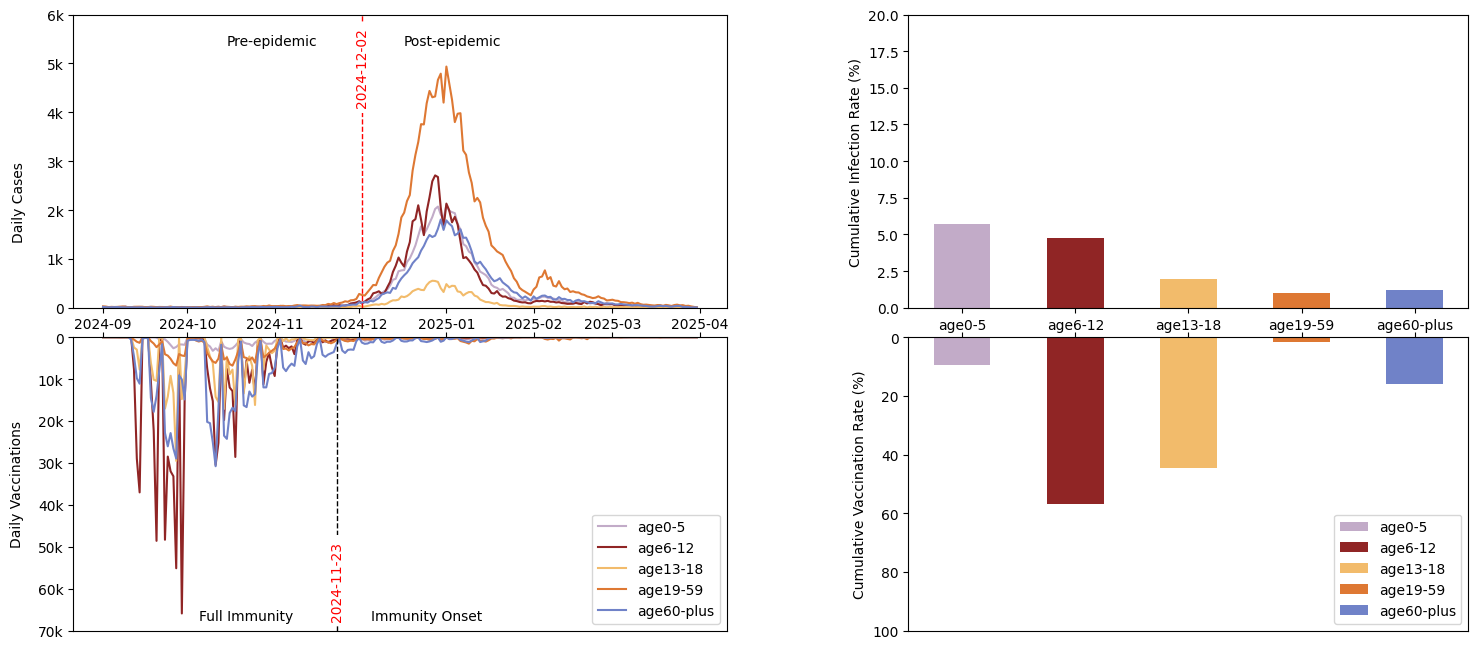

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


def thousands_formatter(x, pos):
    return f'{x/1000:.0f}k' if x >= 1000 else f'{int(x)}'


incidence_data = pd.read_excel('./data/newdata/发病.xlsx')
vaccine_data = pd.read_excel('./data/newdata/疫苗.xlsx')


age_groups = ['age0_5', 'age6_12', 'age13_18', 'age19_59', 'age60_plus']
colors = np.array([
    [194, 171, 200],
    [144, 37, 37],
    [242, 187, 107],
    [222, 120, 51],
    [112, 130, 200],  
]) / 255.0


population = np.array([103.26, 129.98, 72.28, 1413.68, 397.8 + 67.3]) * 1e4


incidence_data['Date'] = pd.to_datetime(incidence_data['Date'])
vaccine_data['Date'] = pd.to_datetime(vaccine_data['Date'])


incidence_data.rename(columns={'age60+': 'age60_plus'}, inplace=True)
vaccine_data.rename(columns={'age60+': 'age60_plus'}, inplace=True)




#2023年的时间范围
# start_date = '2022-09-01'
# end_date = '2023-06-01'

start_date = '2024-09-01'
end_date = '2025-03-31'

incidence_data = incidence_data[(incidence_data['Date'] >= start_date) & (incidence_data['Date'] <= end_date)]
vaccine_data = vaccine_data[(vaccine_data['Date'] >= start_date) & (vaccine_data['Date'] <= end_date)]


total_cases = incidence_data[age_groups].sum()  
total_vaccinations = vaccine_data[age_groups].sum()  

cumulative_infection_rate = total_cases / population * 100  
cumulative_vaccination_rate = total_vaccinations / population * 100 


fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(18, 8), gridspec_kw={'width_ratios': [7, 6], 'hspace': 0.1,  'wspace': 0.3})


for i, age_group in enumerate(age_groups):
    ax1.plot(incidence_data['Date'], incidence_data[age_group], label=age_group, color=colors[i])


ax1_highlight_date = pd.to_datetime('2024-12-02 00:00')
ax1.axvline(x=ax1_highlight_date, color='red', linestyle='--', linewidth=1, label='Event Date')


ax1.text(ax1_highlight_date, ax1.get_ylim()[1] * 0.95, '2024-12-02', color='red', fontsize=10, ha='center', va='center', rotation=90,
         bbox=dict(facecolor='white', edgecolor='none', alpha=1))
ax1.text(ax1_highlight_date - pd.Timedelta(days=32), ax1.get_ylim()[1]*1.08 , 'Pre-epidemic', color='black', fontsize=10, ha='center', va='top', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax1.text(ax1_highlight_date + pd.Timedelta(days=32), ax1.get_ylim()[1]*1.08 , 'Post-epidemic', color='black', fontsize=10, ha='center', va='top', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))


ax1.set_ylim(0, 6000)
ax1.set_ylabel(r'Daily Cases', rotation=90, labelpad=15, ha='right')
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', which='both', pad=3)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


age_groups_labels = [age.replace('_', '-') for age in age_groups]


for i, age_group in enumerate(age_groups):
    ax2.plot(vaccine_data['Date'], vaccine_data[age_group], color=colors[i])


ax2.set_ylim(70000, 0)
ax2.set_ylabel('Daily Vaccinations', rotation=90, labelpad=10, ha='center')
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(axis='x', which='both', labeltop=False, bottom=False)

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax2_highlight_date = pd.to_datetime('2024-11-23 00:00')
ax2.axvline(x=ax2_highlight_date, color='black', linestyle='--', linewidth=1)

ax2.text(ax2_highlight_date - pd.Timedelta(days=32), ax2.get_ylim()[0] * 0.95, 'Full Immunity', color='black', fontsize=10, ha='center', va='center', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax2.text(ax2_highlight_date + pd.Timedelta(days=32), ax2.get_ylim()[0] * 0.95, 'Immunity Onset', color='black', fontsize=10, ha='center', va='center', rotation=0,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
ax2.text(ax2_highlight_date, ax2.get_ylim()[0] * 0.83, '2024-11-23', color='red', fontsize=10, ha='center', va='center', rotation=90,
         bbox=dict(facecolor='white', edgecolor='none', alpha=1))


ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


ax2.legend(age_groups_labels, loc='lower right')


x_positions = np.arange(len(age_groups)) * 3
ax3.bar(x_positions, cumulative_infection_rate, color=colors, width=1.5)
ax3.set_xticks(x_positions)
ax3.set_xticklabels(age_groups_labels)
ax3.set_ylim(0, 20)
ax3.set_ylabel('Cumulative Infection Rate (%)')
ax3.xaxis.set_ticks_position('bottom')


bars = []
for i, age_group in enumerate(age_groups):
    bar = ax4.bar(x_positions[i], cumulative_vaccination_rate[i], color=colors[i], width=1.5)
    bars.append(bar)

ax4.set_xticks(x_positions)
ax4.set_xticklabels(age_groups_labels)
ax4.set_ylim(100, 0)
ax4.set_ylabel('Cumulative Vaccination Rate (%)')
ax4.xaxis.set_ticks_position('top')
ax4.legend(bars, age_groups_labels, loc='lower right')
ax4.tick_params(axis='x', which='both', labeltop=False, bottom=False)

plt.savefig("疫苗双y轴.pdf", format="pdf", dpi=300)


plt.tight_layout()
plt.show()
